#Ajuste Ponimial de Curva (21 exemplares)
Alunos : Victor Calebe e João Victor Rocha Muhamad

# Divisão Dos Exempalres em Set de treinamento e Set de Teste:
Nessa estapa, dividimos 2/3 dos dados para um vetor de treinamento e 1/3 para teste. Foi proposto pelo professor que fizessemos essa divisão de forma alternada, ou seja, a cada 3 elementos do vetor 2 serão para treino e 1 será para teste. 

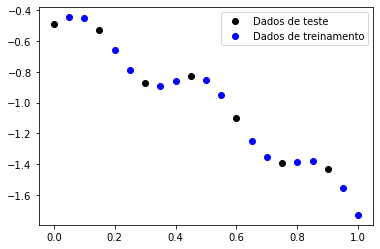

In [ ]:
%matplotlib inline
from pylab import plot, grid, xlabel, ylabel, title, figure, subplot, tight_layout, axis, legend, text, xlim, ylim
import numpy as np

exemplares = 21 
h = lambda x: -0.85*np.exp(0.9*x) + 0.36 + 0.12*np.sin(5*np.pi*x)
x = np.round(np.linspace(0,1,exemplares),5)

xte = []
xtr = []

for i in range(0,len(x),3):
  xte.append(x[i])
  xtr.append(x[i+1]),xtr.append(x[i+2])

xte = np.array(xte)
xtr = np.array(xtr)

hte = h(xte)
htr = h(xtr)

plot(xte,hte,'o',color = 'black')
plot(xtr,htr,'o',color = 'blue')
legend(['Dados de teste','Dados de treinamento'],)

# Geração de Valores Aleatórios de *Distribuição Gaussiana*:
Adição do "noise" aos valores de "xtr".

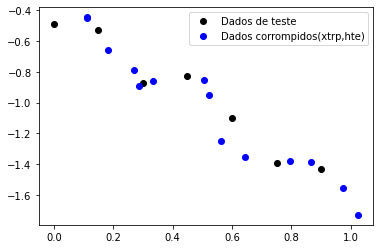

In [ ]:
mu, sigma = 0, 0.05
noise = np.random.normal(mu,sigma,14)
xtrp = noise + xtr

plot(xte,hte,'o',color = 'black')
plot(xtrp,htr,'o',color = 'blue')
legend(['Dados de teste','Dados corrompidos(xtrp,hte)'],)

# Treinamento:
Nessa etapa, treinamos as curvas para ficarem melhor ajustadas aos pontos de "xtrp".

In [ ]:
%matplotlib inline
from numpy import linspace, zeros, pi, cos, sin, exp
from pylab import plot, grid, xlabel, ylabel, title, figure, subplot, tight_layout, axis, legend, text, xlim, ylim

peso1_tr = np.polyfit(xtrp,htr,1)#Pesos da curva_1
peso3_tr = np.polyfit(xtrp,htr,3)#Pesos da curva_3
peso5_tr = np.polyfit(xtrp,htr,5)#Pesos da curva_5
peso7_tr = np.polyfit(xtrp,htr,7)#Pesos da curva_7
peso9_tr = np.polyfit(xtrp,htr,9)#Pesos da curva_9
peso11_tr = np.polyfit(xtrp,htr,11)#Pesos da curva_11
peso13_tr = np.polyfit(xtrp,htr,13)#Pesos da curva_13


# Plotagem de gráfico(treinamento):
Nessa seção vamos plotar os gráficos dos ajustes obtidos na etapa anterior ao lado da curva original para uma melhor análise visual.

(-1.69, -0.430721788675001)

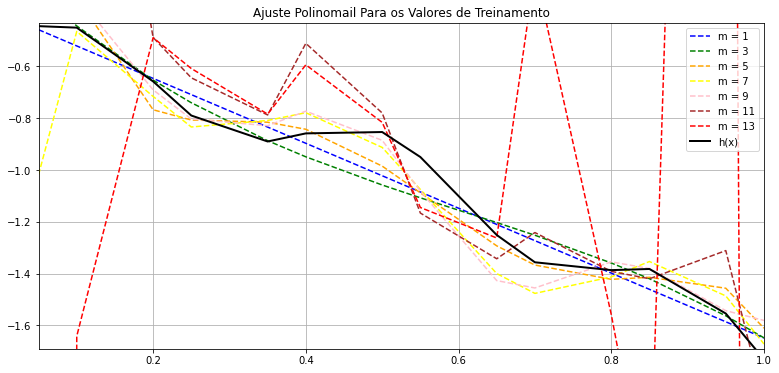

In [ ]:
ajuste1_tr = np.polyval(peso1_tr,xtr)#Cuva ajustada com os pontos
ajuste3_tr = np.polyval(peso3_tr,xtr)#...
ajuste5_tr = np.polyval(peso5_tr,xtr)#...
ajuste7_tr = np.polyval(peso7_tr,xtr)#...
ajuste9_tr = np.polyval(peso9_tr,xtr)#...
ajuste11_tr = np.polyval(peso11_tr,xtr)#...
ajuste13_tr = np.polyval(peso13_tr,xtr)#Cuva ajustada com os pontos


figure(figsize=(13,6))

plot(xtr, ajuste1_tr,'--',color = 'blue') #Fitting
plot(xtr, ajuste3_tr,'--',color = 'green') #Fitting
plot(xtr, ajuste5_tr,'--', color = 'orange') #Fitting
plot(xtr, ajuste7_tr,'--', color = 'yellow') #Fitting
plot(xtr, ajuste9_tr,'--',color = 'pink') #Fitting
plot(xtr, ajuste11_tr,'--',color = 'brown') #Fitting
plot(xtr, ajuste13_tr,'--',color = 'red') #Fitting
plot(xtr,htr,color = 'black',linewidth=2) # h(x)
#
grid(True)
#xlabel('$x$',fontsize=16)
#ylabel('$ajuste(x)$',fontsize=16)
title('Ajuste Polinomail Para os Valores de Treinamento')
legend(['m = 1','m = 3', 'm = 5','m = 7', 'm = 9', 'm = 11', 'm = 13','h(x)'],)
xlim(xtr[0],xtr[-1])
ylim(h(xte)[0]-1.2,h(xte)[-1]+1)
#ylim(-4.25,8)




# Teste e Plotagem das Curvas:

(-1.49, -0.430721788675001)

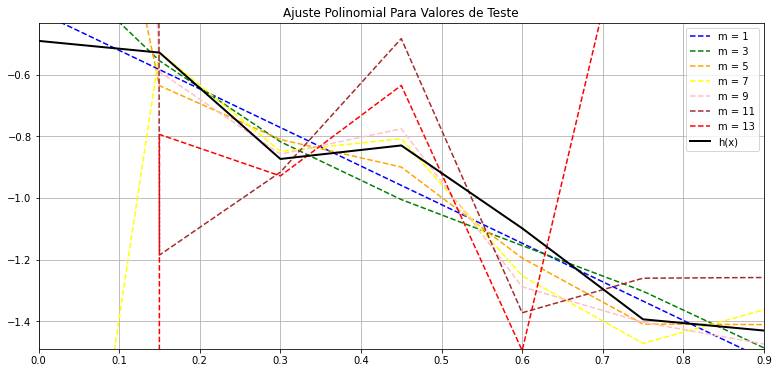

In [ ]:
ajuste1_te = np.polyval(peso1_tr,xte)
ajuste3_te = np.polyval(peso3_tr,xte)
ajuste5_te = np.polyval(peso5_tr,xte)
ajuste7_te = np.polyval(peso7_tr,xte)
ajuste9_te = np.polyval(peso9_tr,xte)
ajuste11_te = np.polyval(peso11_tr,xte)
ajuste13_te = np.polyval(peso13_tr,xte)

figure(figsize=(13,6))


plot(xte, ajuste1_te,'--',color = 'blue') #Fitting
plot(xte, ajuste3_te,'--',color = 'green') #Fitting
plot(xte, ajuste5_te,'--', color = 'orange') #Fitting
plot(xte, ajuste7_te,'--', color = 'yellow') #Fitting
plot(xte, ajuste9_te,'--', color = 'pink') #Fitting
plot(xte, ajuste11_te,'--', color = 'brown') #Fitting
plot(xte, ajuste13_te,'--', color = 'red') #Fitting
plot(xte,hte,color = 'black',linewidth=2) # correto

grid(True)
#xlabel('$x$',fontsize=16)
#ylabel('$ajuste(x)$',fontsize=16)
title('Ajuste Polinomial Para Valores de Teste')
legend(['m = 1', 'm = 3', 'm = 5', 'm = 7', 'm = 9','m = 11','m = 13','h(x)'])
xlim(xte[0],xte[-1])
ylim(h(xte)[0]-1,h(xte)[-1]+1)


# Treino e Calculo do Erro :

[0.07829927904489294, 0.09078870346679237, 0.20196667112295524, 0.1716926240144812, 0.46621319080768353, 8.295569654090704, 21.051285686638394]


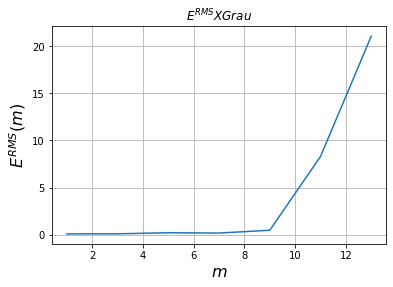

In [ ]:
#treino
import math

erms_tr_wx = []
m_tr = [1,3,5,7,9,11,13]

erms_w1 = (ajuste1_tr - htr)**2
erms_tr_wx.append(math.sqrt(sum(erms_w1)/len(xtr)))

erms_w3 = (ajuste3_tr - htr)**2
erms_tr_wx.append(math.sqrt(sum(erms_w3)/len(xtr)))

erms_w5 = (ajuste5_tr - htr)**2
erms_tr_wx.append(math.sqrt(sum(erms_w5)/len(xtr)))

erms_w7 = (ajuste7_tr - htr)**2
erms_tr_wx.append(math.sqrt(sum(erms_w7)/len(xtr)))

erms_w9 = (ajuste9_tr - htr)**2
erms_tr_wx.append(math.sqrt(sum(erms_w9)/len(xtr)))

erms_w11 = (ajuste11_tr - htr)**2
erms_tr_wx.append(math.sqrt(sum(erms_w11)/len(xtr)))

erms_w13 = (ajuste13_tr - htr)**2
erms_tr_wx.append(math.sqrt(sum(erms_w13)/len(xtr)))

plot(m_tr,erms_tr_wx)

grid(True)
xlabel('$m$',fontsize=16)
ylabel('$E^{RMS}(m)$',fontsize=16)
title('$E^{RMS} X Grau$')

print(erms_tr_wx)

# Teste e Calculo do erro :

[0.08755124926445236, 0.14448627084319945, 0.6531596143309244, 0.99740898617704, 3.15536488088417, 62.92578948572846, 309.67268453887914]


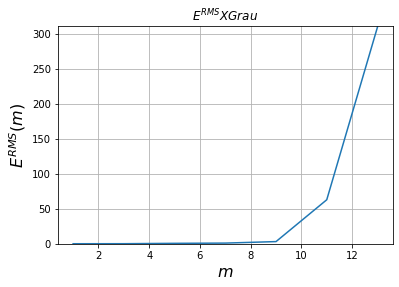

In [ ]:
erms_te_wx = []
te_wx = [1, 3, 5, 7, 9, 11, 13]

erms_w1 = (ajuste1_te - hte)**2
erms_te_wx.append(math.sqrt(sum(erms_w1)/len(xte)))

erms_w3 = (ajuste3_te - hte)**2
erms_te_wx.append(math.sqrt(sum(erms_w3)/len(xte)))

erms_w5 = (ajuste5_te - hte)**2
erms_te_wx.append(math.sqrt(sum(erms_w5)/len(xte)))

erms_w7 = (ajuste7_te - hte)**2
erms_te_wx.append(math.sqrt(sum(erms_w7)/len(xte)))

erms_w9 = (ajuste9_te - hte)**2
erms_te_wx.append(math.sqrt(sum(erms_w9)/len(xte)))

erms_w11 = (ajuste11_te - hte)**2
erms_te_wx.append(math.sqrt(sum(erms_w11)/len(xte)))

erms_w13 = (ajuste13_te - hte)**2
erms_te_wx.append(math.sqrt(sum(erms_w13)/len(xte)))

plot(te_wx, erms_te_wx)

grid(True)
xlabel('$m$',fontsize=16)
ylabel('$E^{RMS}(m)$',fontsize=16)
title('$E^{RMS} X Grau$')
#xlim(0,13)
ylim(0,erms_te_wx[-1]+1)
print(erms_te_wx)

